<img src="https://rhyme.com/assets/img/logo-dark.png" align="center">

<h2 align="center"> Univariate Linear Regression </h2>

# Task 2: Load the Data and Libraries
---

In [1]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

## 知识点：%matplotlib inline
其中最后一句%matplotlib inline比较奇怪，而且无论你是用哪个python的IDE如spyder或者pycharm,这个地方都会报错，显示是invalid syntax（无效语法）。那为什么代码里面还是会有这一句呢？原来是这样的。

%matplotlib作用
- 在使用jupyter notebook 或者 jupyter qtconsole的时候，才会经常用到%matplotlib，也就是说那一份代码可能就是别人使用jupyter notebook 或者 jupyter qtconsole进行编辑的。
- 而%matplotlib具体作用是当你调用matplotlib.pyplot的绘图函数plot()进行绘图的时候，或者生成一个figure画布的时候，可以直接在你的python console里面生成图像。

而我们在spyder或者pycharm实际运行代码的时候，可以直接注释掉这一句，也是可以运行成功的。

---

In [2]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)


In [4]:
data = pd.read_csv('/content/bike_sharing_data.txt') #bike_sharing_data.txt
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


# Task 3: Visualize the Data
---

Text(0.5, 1.0, 'Profit in $10000s vs City Population in 10000s')

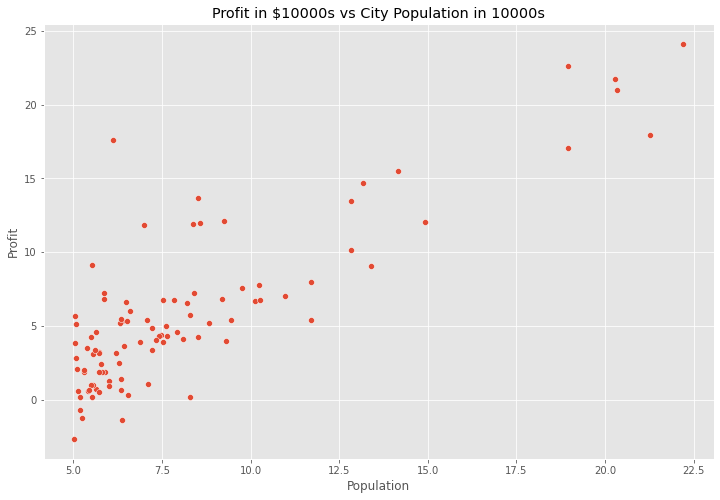

In [6]:
ax = sns.scatterplot(x='Population', y='Profit', data=data)
ax.set_title('Profit in $10000s vs City Population in 10000s')

## 知识点：seaborn.scatterplot
```
seaborn.scatterplot(x=None, y=None, hue=None,
                    style=None, size=None, data=None, 
                    palette=None, hue_order=None, hue_norm=None,
                    sizes=None, size_order=None, size_norm=None, 
                    markers=True, style_order=None, x_bins=None,
                    y_bins=None, units=None, estimator=None, 
                    ci=95, n_boot=1000, alpha='auto', x_jitter=None,
                    y_jitter=None, legend='brief', ax=None, **kwargs)
                    ```

- data: DataFrame
- x,y为数据中变量的名称; 作用：对将生成具有不同颜色的元素的变量进行分组。可以是分类或数字.
- size：数据中的名称  作用：根据指定的名称(列名)，根据该列中的数据值的大小生成具有不同大小的效果。可以是分类或数字。
- style:数据中变量名称(比如：二维数据中的列名) 作用：对将生成具有不同破折号、或其他标记的变量进行分组。
- palette:调试板名称，列表或字典类型  作用：设置hue指定的变量的不同级别颜色。
- hue_order:列表(list)类型  作用：指定hue变量出现的指定顺序，否则他们是根据数据确定的。
- hue_norm:tuple或Normalize对象
- sizes:list dict或tuple类型  作用：设置线宽度，当其为数字时，它也可以是一个元组，指定要使用的最大和最小值，会自动在该范围内对其他值进行规范化。

---

# Task 4: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [7]:
def cost_function(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y) ** 2
    
    return 1 / (2 * m) * np.sum(error)


### numpy.dot() 和 x.dot(y) 为矩阵乘法计算。        
### size dataframe的size属性返回的是dataframe的value的个数

In [8]:
m = data.Population.values.size
m

97

### 知识点：np.append
函数```np.append(arr, values, axis=None)```      
作用：为原始array添加一些values

**参数**：
- arr:需要被添加values的数组
- values:添加到数组arr中的值（array_like，类数组）
- axis:可选参数，如果axis没有给出，那么arr，values都将先展平成一维数组。

注：如果axis被指定了，那么arr和values需要有相同的shape，否则报错：ValueError: arrays must have same number of dimensions

**补充对axis的理解**

axis的最大值为数组arr的维数-1，如arr维数等于1，axis最大值为0；arr维数等于2，axis最大值为1，以此类推。

当arr的维数为2(理解为单通道图)，axis=0表示沿着行方向添加values；axis=1表示沿着列方向添加values

当arr的维数为3(理解为多通道图)，axis=0，axis=1时同上；axis=2表示沿着深度方向添加values

返回：添加了values的新数组

---

In [9]:
X = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis=1)  # 2维

### 知识点：np创建数组
用一个创建一维数组 (Creating one-dimensional array with ones)
```
import numpy as np
 
array_1d = np.ones(3)
print(array_1d)

[1. 1. 1.]
```
创建多维数组 ( Creating Multi-dimensional array)
```
import numpy as np
 
array_2d = np.ones((2, 3)) # 
print(array_2d)

[[1. 1. 1.]
 [1. 1. 1.]]

```


In [10]:
print(X.shape)

(97, 2)


In [11]:
y = data.Profit.values.reshape(m, 1)
print(y.shape)

(97, 1)


In [12]:
theta = np.zeros((2, 1))

cost_function(X, y, theta)

32.072733877455676

# Task 5: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [13]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(), (y_pred - y)) # （m * 2）装置为 （2 * m） 再乘上 (m * 1)
        theta -= alpha * 1 / m * error
        costs.append(cost_function(X, y, theta))   
    return theta, costs

In [14]:
theta, costs = gradient_descent(X, y, theta, alpha=0.01, iterations=2000)
print(len(theta))
print(len(costs))

2
2000


In [15]:

print('h(x) = {} + {}*x1'.format(str(round(theta[0, 0], 2)),
                               str(round(theta[1, 0], 2))))

h(x) = -3.79 + 1.18*x1


# Task 6: Visualising the Cost Function $J(\theta)$
---

In [16]:
from mpl_toolkits.mplot3d import Axes3D

### 知识点：mpl_toolkits.mplot3d
mpl_toolkits.mplot3d是Matplotlib里面专门用来画三维图的工具包，官方指南请点击此处[《mplot3d tutorial》](https://matplotlib.org/tutorials/toolkits/mplot3d.html)

```
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)
delta = 0.125
# 生成代表X轴数据的列表
x = np.arange(-3.0, 3.0, delta)
# 生成代表Y轴数据的列表
y = np.arange(-2.0, 2.0, delta)
# 对x、y数据执行网格化
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
# 计算Z轴数据（高度数据）
Z = (Z1 - Z2) * 2
# 绘制3D图形
ax.plot_surface(X, Y, Z,
    rstride=1,  # rstride（row）指定行的跨度
    cstride=1,  # cstride(column)指定列的跨度
    cmap=plt.get_cmap('rainbow'))  # 设置颜色映射
# 设置Z轴范围
ax.set_zlim(-2, 2)
# 设置标题
plt.title("3D图")
plt.savefig("d:/test.png")
plt.show()
```

### 知识点：numpy.linspace
```
numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
```

在指定的间隔内返回均匀间隔的数字。

返回num均匀分布的样本，在[start, stop]。

这个区间的端点可以任意的被排除在外。

---

In [17]:
theta_0 = np.linspace(-10, 10, 100)
print('theta_0 个数：', len(theta_0))
theta_1 = np.linspace(-1, 4, 100)
print('theta_1 个数：', len(theta_1))

theta_0 个数： 100
theta_1 个数： 100


In [18]:
# 设置 theta_0/theta_1的初始值，看损失函数的值
cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(X, y, t)

### 知识点：figure语法说明
```
figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True)
```
- num:图像编号或名称，数字为编号 ，字符串为名称
- figsize:指定figure的宽和高，单位为英寸；
- dpi参数指定绘图对象的分辨率，即每英寸多少个像素，缺省值为80      1英寸等于2.5cm,A4纸是 21*30cm的纸张 
- facecolor:背景颜色
- edgecolor:边框颜色
- frameon:是否显示边框
---

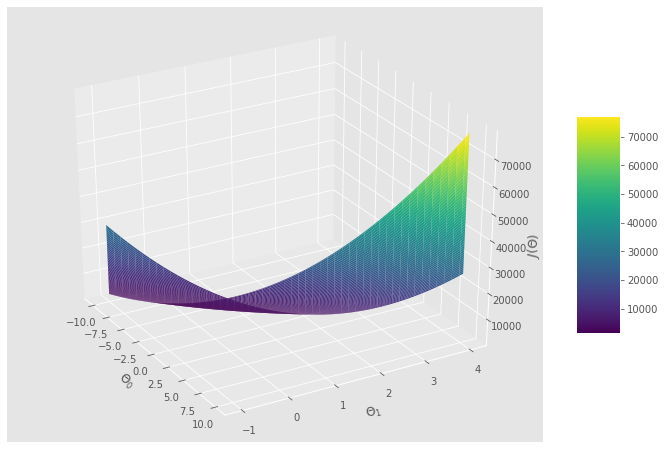

In [19]:
fig = plt.figure(figsize = (12, 8))
# 在三维空间中绘图
ax = fig.gca(projection = '3d')
'''
3D 图形需要的数据与等高线图基本相同：X、Y 数据决定坐标点，
Z 轴数据决定 X、Y 坐标点对应的高度。与等高线图使用等高线来代表高度不同，
3D 图形将会以更直观的形式来表示高度。
为了绘制 3D 图形，需要调用 Axes3D 对象的 plot_surface() 方法来完成。
'''
surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = 'viridis')
fig.colorbar(surf, shrink=0.5, aspect=5) 
# shrink颜色条伸缩比例（0-1），aspect颜色条宽度（反比例，数值越大宽度越窄）
plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
ax.set_zlabel('$J(\Theta)$')
ax.view_init(30, 330)

plt.show()

# Task 7: Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

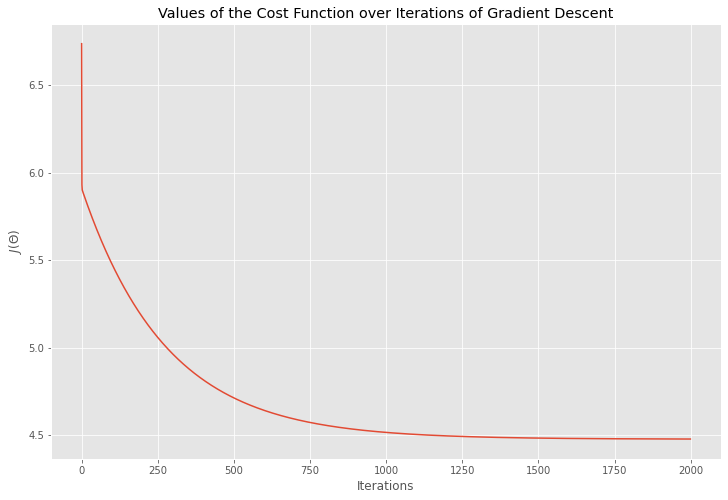

In [20]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('$J(\Theta)$')
plt.title('Values of the Cost Function over Iterations of Gradient Descent');

# Task 8: Training Data with Linear Regression Fit
---

In [21]:
theta.shape #(2, 1)

(2, 1)

In [22]:
theta

array([[-3.78806857],
       [ 1.18221277]])

### 知识点：numpy.squeeze()函数

语法：numpy.squeeze(a, axis = None)
 - 1）a表示输入的数组；      
 - 2）axis用于指定需要删除的维度，但是指定的维度必须为单维度，否则将会报错；
 - 3）axis的取值可为None 或 int 或 tuple of ints, 可选。若axis为空，则删除所有单维度的条目；
 - 4）返回值：数组
 - 5) 不会修改原数组；


In [24]:
theta = np.squeeze(theta)
theta.shape #(2,)

(2,)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


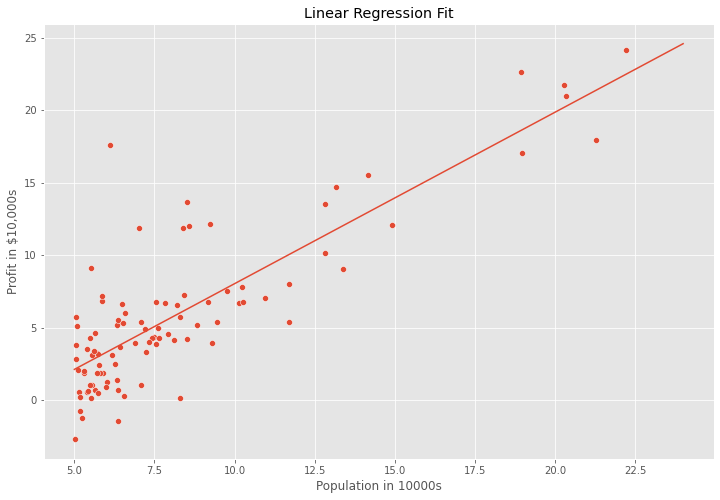

In [25]:

sns.scatterplot(x='Population', y='Profit', data=data)

x_value = [x for x in range(5, 25) ]
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value, y_value)

plt.xlabel('Population in 10000s')
plt.ylabel('Profit in $10,000s')
plt.title('Linear Regression Fit');

### Task 9: Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$

In [26]:
def predict_function(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

In [27]:
theta

array([-3.78806857,  1.18221277])

In [28]:
np.array([1, 4])

array([1, 4])

np.array()
将列表list或元组tuple转换为 ndarray 数组。

numpy.array(object, dtype=None, copy=True, order=None, subok=False, ndmin=0)

object：列表、元组等。        
dtype：数据类型。如果未给出，则类型为被保存对象所需的最小类型。        
copy：布尔来写，默认 True，表示复制对象。     
order：顺序。     
subok：布尔类型，表示子类是否被传递。     
ndmin：生成的数组应具有的最小维数。      
 
---

1.np.array构造函数      
用法：np.array([1,2,3,4,5])      

1.1 numpy array 和 python list 有什么区别？     
标准Python的列表(list)中，元素本质是对象。如：L = [1, 2, 3]，需要3个指针和三个整数对象，对于数值运算比较浪费内存和CPU。因此，Numpy提供了ndarray(N-dimensional array object)对象：存储单一数据类型的多维数组。    
1.2 如何强制生成一个 float 类型的数组      
d = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]], dtype=np.float)      
1.3 使用astype(int)对上述 array 进行强制类型转换 
    
---

In [ ]:
y_pred_1 = predict_function(np.array([1, 4]), theta) * 10000
print('For a population of 40,0000 people, the modek predicts a profit $' 
      + str(round(y_pred_1, 0)))

For a population of 40,0000 people, the modek predicts a profit $8781.0


In [29]:
y_pred_2 = predict_function(np.array([1, 8.3]), theta) * 10000
print('For a population of 83,000 people, the modek predicts a profit $'
      + str(round(y_pred_2, 0)))

For a population of 83,000 people, the modek predicts a profit $60243.0
